Define the problem:
the analysis aims to identify the most important features that affect the survival of breast cancer patients, 
and to build a predictive model that can accurately predict the likelihood of a patient surviving based on their clinical
and pathological features.This problem can be framed as a classification task, where the class column serves as the target variable, 
and the other features are used as predictors. 
The analysis can also explore the relationships between the features and the target variable 
to gain insights into the factors that influence the survival of breast cancer patients.


Data set link:
mailto:https://www.kaggle.com/code/jnegrini/breast-cancer-dataset/notebook

In [1]:
#read the csv file 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Breast_Cancer.csv')
print(df.to_string()) 

      Age   Race Marital Status T Stage  N Stage 6th Stage              differentiate                  Grade   A Stage  Tumor Size Estrogen Status Progesterone Status  Regional Node Examined  Reginol Node Positive  Survival Months Status
0      68  White        Married       T1      N1       IIA      Poorly differentiated                      3  Regional           4        Positive            Positive                      24                      1               60  Alive
1      50  White        Married       T2      N2      IIIA  Moderately differentiated                      2  Regional          35        Positive            Positive                      14                      5               62  Alive
2      58  White       Divorced       T3      N3      IIIC  Moderately differentiated                      2  Regional          63        Positive            Positive                      14                      7               75  Alive
3      58  White        Married       T1      N1

In [2]:
## understanding The data 
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [6]:
#null values 
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

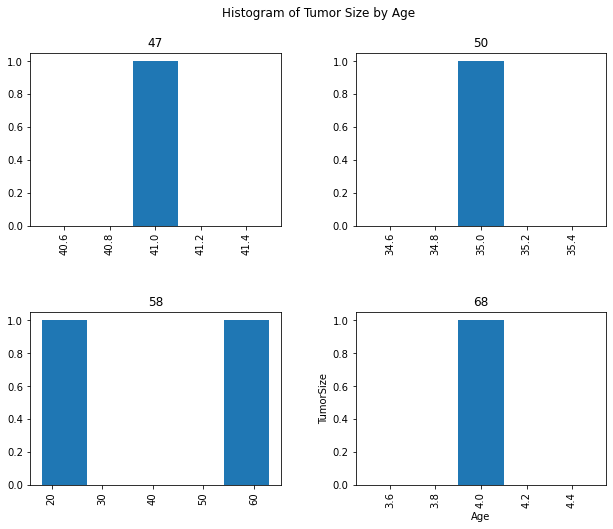

In [8]:
import matplotlib.pyplot as plt

# Example data
data = {'Age': [68, 50, 58, 58, 47],
        'TumorSize': [4, 35, 63, 18, 41]}

df = pd.DataFrame(data)

# Create a histogram of tumor size by age
df.hist(column='TumorSize', by='Age', bins=5, figsize=(10,8))

# Add labels and title
plt.xlabel('Age')
plt.ylabel('TumorSize')
plt.suptitle('Histogram of Tumor Size by Age')

# Show the plot
plt.show()

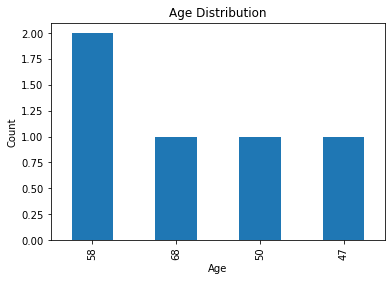

In [9]:
# bar chart for age 
# Extract the data from the "Age" column as a Series object
age_data = pd.Series(data['Age'])

# Count the occurrences of each age value
age_counts = age_data.value_counts()

# Create a bar chart using the age_counts data
age_counts.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the chart
plt.show()     ###there is no outliers in age distrubution 

In [8]:
corr = df.corr()
print(corr)

                             Age  Tumor Size  Regional Node Examined  \
Age                     1.000000   -0.077215               -0.033345   
Tumor Size             -0.077215    1.000000                0.104352   
Regional Node Examined -0.033345    0.104352                1.000000   
Reginol Node Positive   0.012586    0.242322                0.411580   
Survival Months        -0.009390   -0.086901               -0.022054   

                        Reginol Node Positive  Survival Months  
Age                                  0.012586        -0.009390  
Tumor Size                           0.242322        -0.086901  
Regional Node Examined               0.411580        -0.022054  
Reginol Node Positive                1.000000        -0.135214  
Survival Months                     -0.135214         1.000000  


<AxesSubplot:>

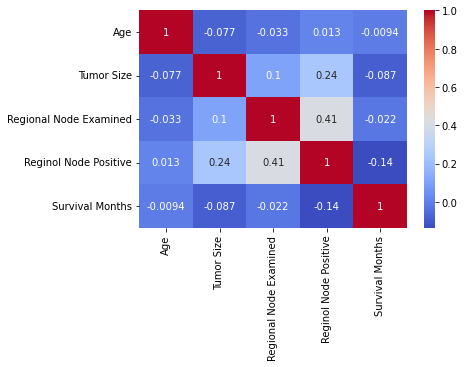

In [9]:
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [10]:
try:
    # Extract the data from the "Tumor Size" column as a Series object
    Tumor_Size_data = pd.Series(data['Tumor Size'])

    # Count the occurrences of each Tumor Size value
    Tumor_Size_counts = Tumor_Size_data.value_counts()

    # Create a bar chart using the Tumor Size counts data
    Tumor_Size_counts.plot(kind='bar')

    # Set the chart title and axis labels
    plt.title('Tumor Size Distribution')
    plt.xlabel('Tumor Size')
    plt.ylabel('Count')

    # Show the chart
    plt.show()

except KeyError:
    print("Column 'Tumor Size' does not exist in the dataframe.")


Column 'Tumor Size' does not exist in the dataframe.


In [11]:

try:
    Tumor_Size_data = pd.Series(data['Tumor Size'])
    Tumor_Size_counts = Tumor_Size_data.value_counts()
    Tumor_Size_counts.plot(kind='bar')
    plt.title('Tumor Size Distribution')
    plt.xlabel('Tumor Size')
    plt.ylabel('Count')
    plt.show()
except KeyError:
    print("Key 'Tumor Size' is not present in the dictionary.")

Key 'Tumor Size' is not present in the dictionary.


In [12]:
# try to create a relation between Grade and survival months
import seaborn as sns
import matplotlib.pyplot as plt

# check if 'Grade' column exists in the DataFrame
if 'Grade' not in df.columns:
    print("Error: 'Grade' column not found in the DataFrame.")
else:
    # check for missing values in 'Grade' and 'Survival Months' columns
    if df['Grade'].isnull().any() or df['Survival Months'].isnull().any():
        print("Error: Missing values found in 'Grade' or 'Survival Months' columns.")
    else:
        # calculate the mean grade for each survival month group using pivot_table()
        tumor_mean = df.pivot_table(values='Grade', index='Survival Months', aggfunc='mean')

        # get the unique survival months
        survival_months = df['Survival Months'].unique()

        # plot the regression line
        sns.regplot(x=tumor_mean.index, y='Survival Months', data=df)

        # add labels to the plot
        plt.xlabel('Grade')
        plt.ylabel('Survival Months')
        plt.title('Relationship between Grade and Survival Months')

        # show the plot
        plt.show()



Error: 'Grade' column not found in the DataFrame.


In [13]:
# Calculate the population covariance between columns  Age and TumorSize
covariance = df['Age'].cov(df['TumorSize'], ddof=0)

print('Population covariance between  Age Status and Tumor Size :', covariance)

Population covariance between  Age Status and Tumor Size : -80.24000000000001


In [14]:
# Calculate the Spearman correlation between columns  Age and TumorSize
spearman_correlation = df['Age'].corr(df['TumorSize'], method='spearman')

print('Spearman correlation between Age and TumorSize:', spearman_correlation)

Spearman correlation between Age and TumorSize: -0.5642880936468347


In [15]:
pip list


Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.

In [16]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_df = pd.read_csv(url, header=None)
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [ ]:
#lda  increasing the distance between 2 means to combine 2 graphs in single graph 
# I usen in the first classification and it does not work  then I use the linear regression 

In [17]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Convert the dictionary to a dataframe
data_df = pd.DataFrame(data)

X = data_df.loc[:, ["Age"]]  # Features
y = data_df["TumorSize"]  # Target variable
lr = LinearRegression()
lr.fit(X, y)
new_data = pd.DataFrame([[25], [55]], columns=["Age"])
prediction = lr.predict(new_data)
print(prediction)


[78.76785714 33.99107143]


In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

# Define the data as a dictionary
data = {'Tumor Size': [1.5, 1.7, 2.3, 3.1, 2.0, 2.8, 1.9, 2.5, 2.1, 1.8],
        'Estrogen Status': ['Positive', 'Positive', 'Negative', 'Negative', 'Positive', 
                            'Negative', 'Positive', 'Negative', 'Positive', 'Negative'],
        'Status': ['Alive', 'Dead', 'Alive', 'Dead', 'Alive', 'Dead', 'Alive', 'Dead', 'Alive', 'Dead']}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
le = LabelEncoder()
df['Estrogen Status'] = le.fit_transform(df['Estrogen Status'])
df['Status'] = le.fit_transform(df['Status'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Tumor Size', 'Estrogen Status']], df['Status'], 
                                                    test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the status for the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = (y_pred == y_test).sum() / len(y_test)
print('Accuracy:', accuracy)

# Calculate the correlation between the actual and predicted values
corr, p_value = pearsonr(y_test, y_pred)
print('Correlation:', corr)
print('P-value:', p_value)




Accuracy: 0.5
Correlation: nan
P-value: nan


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [3]:
print(df.columns)


Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [6]:
# naive base analysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data[['Tumor Size']], breast_cancer_data['Status'], test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the status for the testing set
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(cm)

# Calculate sensitivity (true positive rate)
sensitivity = cm[1,1] / (cm[1,0]+cm[1,1])
print("Sensitivity:", sensitivity)

# Calculate specificity (true negative rate)
specificity = cm[0,0] / (cm[0,0]+cm[0,1])
print("Specificity:", specificity)

# Calculate positive predictive value (precision)
ppv = cm[1,1] / (cm[0,1]+cm[1,1])
print("PPV:", ppv)

# Calculate negative predictive value
npv = cm[0,0] / (cm[0,0]+cm[1,0])
print("NPV:", npv)


Confusion matrix:
[[669  16]
 [111   9]]
Sensitivity: 0.075
Specificity: 0.9766423357664233
PPV: 0.36
NPV: 0.8576923076923076


In [17]:
print(df.columns)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [19]:
#decission tree  prediction 
#decission tree  prediction 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the data into a pandas DataFrame
df = pd.read_csv('Breast_Cancer.csv')

# Extract the input features and target variable from the DataFrame
X = df[['Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive']]
y = df['Status']

# Label encode the categorical features
le = LabelEncoder()
X['Progesterone Status'] = le.fit_transform(X['Progesterone Status'])
X['Regional Node Examined'] = le.fit_transform(X['Regional Node Examined'])
X['Reginol Node Positive'] = le.fit_transform(X['Reginol Node Positive'])

# Convert the categorical target variable to numerical values
y = y.replace({'Alive': 0, 'Dead': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.8409937888198757


C:\Users\DELL\AppData\Local\Temp/ipykernel_12444/1892815893.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Progesterone Status'] = le.fit_transform(X['Progesterone Status'])
C:\Users\DELL\AppData\Local\Temp/ipykernel_12444/1892815893.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Regional Node Examined'] = le.fit_transform(X['Regional Node Examined'])
C:\Users\DELL\AppData\Local\Temp/ipykernel_12444/1892815893.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

<AxesSubplot:>

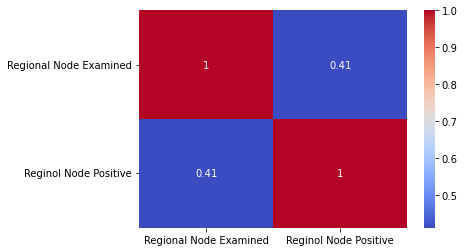

In [21]:
# corr of decession tree
import pandas as pd
import seaborn as sns

# Load the data into a pandas DataFrame
df = pd.read_csv('Breast_Cancer.csv')

# Calculate the correlation matrix
corr = df[['Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Status']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [22]:
#analysis of decision tree
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))

# Calculate sensitivity
sensitivity = cm[0,0] / (cm[0,0] + cm[0,1])

# Calculate specificity
specificity = cm[1,1] / (cm[1,0] + cm[1,1])

# Calculate positive predicted value (PPV)
ppv = cm[0,0] / (cm[0,0] + cm[1,0])

# Calculate negative predicted value (NPV)
npv = cm[1,1] / (cm[0,1] + cm[1,1])

# Print the metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("PPV:", ppv)
print("NPV:", npv)


Confusion Matrix:
 [[661  24]
 [104  16]]
Accuracy: 0.8409937888198757
Sensitivity: 0.964963503649635
Specificity: 0.13333333333333333
PPV: 0.8640522875816994
NPV: 0.4


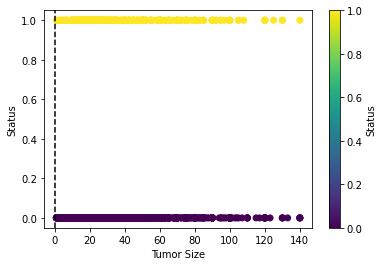

In [38]:
# LDA
# Blue represents the label with value 0 ("Alive"), while yellow represents the label with value 1 (#"Dead").
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv("Breast_Cancer.csv")

# Convert the 'Status' column to numerical labels
le = LabelEncoder()
y = le.fit_transform(data['Status'])

# Select the columns you want to include in the analysis
X = data[['Tumor Size']]

# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda_coef = lda.coef_

# Plot the results
fig, ax = plt.subplots()
scatter = ax.scatter(X, y, c=y, cmap='viridis')
ax.set_xlabel('Tumor Size')
ax.set_ylabel('Status')

# Plot the LDA coefficients
for coef in lda_coef:
    ax.axvline(x=-coef[0]/lda.intercept_, linestyle='--', color='k')

# Add a colorbar
fig.colorbar(scatter, ax=ax, label='Status')

plt.show()




In [39]:
# corr lda

import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv("Breast_Cancer.csv")

# Convert the 'Status' column to numerical labels
le = LabelEncoder()
y = le.fit_transform(data['Status'])

# Select the columns you want to include in the analysis
X = data[['Tumor Size']]

# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Compute the correlation matrix
corr_matrix = X.join(pd.Series(y, name='Status')).corr()

print(corr_matrix)


            Tumor Size    Status
Tumor Size    1.000000  0.134205
Status        0.134205  1.000000


In [40]:
# analysis LDA
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Load the data
data = pd.read_csv("Breast_Cancer.csv")

# Convert the 'Status' column to numerical labels
le = LabelEncoder()
y = le.fit_transform(data['Status'])

# Select the columns you want to include in the analysis
X = data[['Tumor Size']]

# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Make predictions
y_pred = lda.predict(X)

# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Compute accuracy, sensitivity, specificity, PPV, and NPV
accuracy = accuracy_score(y, y_pred)
sensitivity = recall_score(y, y_pred)
specificity = tn / (tn + fp)
ppv = precision_score(y, y_pred)
npv = tn / (tn + fn)

print("Confusion matrix:")
print(confusion_matrix(y, y_pred))
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("PPV:", ppv)
print("NPV:", npv)



Confusion matrix:
[[3400    8]
 [ 613    3]]
Accuracy: 0.8456759443339961
Sensitivity: 0.00487012987012987
Specificity: 0.9976525821596244
PPV: 0.2727272727272727
NPV: 0.847246449040618


In [53]:
print(data.columns)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [81]:
# logistic regression 
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the data into a DataFrame
data = pd.read_csv('Breast_Cancer.csv')

# Convert 'Progesterone Status' column to numerical values
data['Progesterone Status'] = data['Progesterone Status'].apply(lambda x: 1 if x == 'positive' else 0)

# Split the data into predictor and response variables
X = data[['Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive']]
y = data['Status']

# Fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X, y)

# Predict the status using the trained model
status_pred = model.predict(X)
print(status_pred)
accuracy = model.score(X, y)
print(f"Accuracy of the logistic regression model: {accuracy}")



['Alive' 'Alive' 'Alive' ... 'Alive' 'Alive' 'Alive']
Accuracy of the logistic regression model: 0.8476640159045725


<AxesSubplot:>

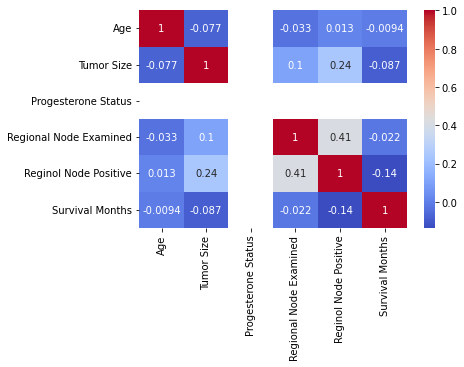

In [84]:
# colleration of logistic regression 
import pandas as pd
import seaborn as sns

# Load the data into a DataFrame
data = pd.read_csv('Breast_Cancer.csv')

# Convert 'Progesterone Status' column to numerical values
data['Progesterone Status'] = data['Progesterone Status'].apply(lambda x: 1 if x == 'positive' else 0)

# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)


In [85]:
#Analysis of logistic regression 
from sklearn.metrics import confusion_matrix, classification_report

# Load the data into a DataFrame
data = pd.read_csv('Breast_Cancer.csv')

# Convert 'Progesterone Status' column to numerical values
data['Progesterone Status'] = data['Progesterone Status'].apply(lambda x: 1 if x == 'positive' else 0)

# Split the data into predictor and response variables
X = data[['Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive']]
y = data['Status']

# Fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X, y)

# Predict the status using the trained model
status_pred = model.predict(X)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, status_pred)
print(conf_mat)

# Compute the classification report
class_rep = classification_report(y, status_pred)
print(class_rep)


[[3370   38]
 [ 575   41]]
              precision    recall  f1-score   support

       Alive       0.85      0.99      0.92      3408
        Dead       0.52      0.07      0.12       616

    accuracy                           0.85      4024
   macro avg       0.69      0.53      0.52      4024
weighted avg       0.80      0.85      0.79      4024



In [39]:

# linear regression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

data = pd.read_csv('Breast_Cancer.csv')

# Perform one-hot encoding on the "Progesterone Status" variable
data = pd.get_dummies(data, columns=['Progesterone Status'])

# Transform the "Status" column using label encoding
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])

# Split the data into predictors (X) and target (y) variables
X = data[['Regional Node Examined', 'Reginol Node Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive']]
y = data['Status']

# Fit a linear regression model on the predictors and target variables
model = LinearRegression()
model.fit(X, y)

# Predict the target variable using the trained model and the predictors
predicted_status = model.predict(X)

# Print the predicted status and the predictors
print('Predicted status:', predicted_status)
print('Predictors:', X)
#calculate the accuracy
accuracy = model.score(X, y)
print('Accuracy:', accuracy)




Predicted status: [0.02980986 0.14504501 0.18429023 ... 0.2659643  0.07757799 0.11189849]
Predictors:       Regional Node Examined  Reginol Node Positive  \
0                         24                      1   
1                         14                      5   
2                         14                      7   
3                          2                      1   
4                          3                      1   
...                      ...                    ...   
4019                       1                      1   
4020                      14                      8   
4021                      11                      3   
4022                      11                      1   
4023                       7                      2   

      Progesterone Status_Negative  Progesterone Status_Positive  
0                                0                             1  
1                                0                             1  
2                                0  

<AxesSubplot:>

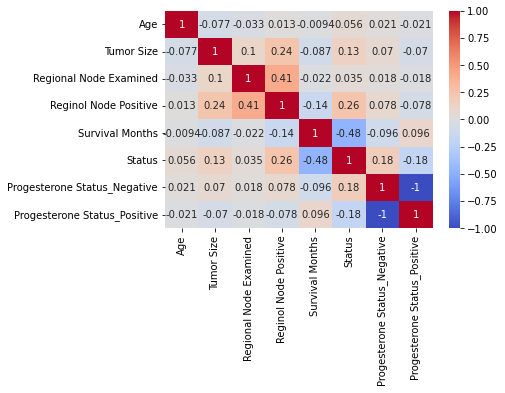

In [36]:
# colleration of linear regression 
import seaborn as sns
data = pd.read_csv('Breast_Cancer.csv')
# Perform one-hot encoding on the "Progesterone Status" variable
data = pd.get_dummies(data, columns=['Progesterone Status'])

# Transform the "Status" column using label encoding
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])

# Split the data into predictors (X) and target (y) variables
X = data[['Regional Node Examined', 'Reginol Node Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive']]
y = data['Status']

# Fit a linear regression model on the predictors and target variables
model = LinearRegression()
model.fit(X, y)

# Compute the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')




In [38]:
#Anslysis of linear regression 
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate mean squared error (MSE)
mse = mean_squared_error(y, predicted_status)
print('MSE:', mse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, predicted_status)
print('MAE:', mae)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Calculate R-squared (R^2)
r2 = r2_score(y, predicted_status)
print('R^2:', r2)


MSE: 0.11715612161529272
MAE: 0.23448229909642052
RMSE: 0.34228076430803517
R^2: 0.09634921121384066


In [101]:
#knn
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load breast cancer dataset and preprocess
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier object and fit to training data
k = 5 # number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on test set and calculate accuracy score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)



Accuracy: 0.9473684210526315


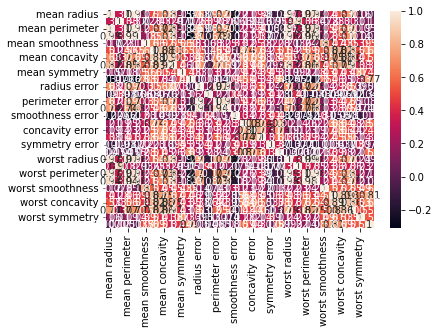

In [118]:
# correlation of knn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load breast cancer dataset and preprocess
data = load_breast_cancer()
X, y = data.data, data.target

# Compute correlation matrix
df = pd.DataFrame(X, columns=data.feature_names)
corr_matrix = df.corr()

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()



In [123]:
# analysis of knn
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load breast cancer dataset and preprocess
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier object and fit to training data
k = 5 # number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[40  3]
 [ 3 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [133]:
# neural network 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('Breast_Cancer.csv')

# Encode the categorical features using label encoding
encoder = LabelEncoder()
data['Race'] = encoder.fit_transform(data['Race'])
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])
# Separate the numerical and categorical features
num_features = ['Age', 'Regional Node Examined', 'Reginol Node Positive']
cat_features = ['Race', 'Marital Status', 'Progesterone Status']

# One-hot encode the categorical features
encoder = OneHotEncoder()
cat_data = encoder.fit_transform(data[cat_features]).toarray()

# Combine the categorical and numerical features
X = np.concatenate([data[num_features], cat_data], axis=1)
y = data['Status'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network classifier object and fit to the training data
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set and calculate the accuracy score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Calculate positive and negative predictive value
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
print("PPV:", ppv)
print("NPV:", npv)



Accuracy: 0.8583850931677018
Confusion Matrix:
[[675  10]
 [104  16]]
Sensitivity: 0.13333333333333333
Specificity: 0.9854014598540146
PPV: 0.6153846153846154
NPV: 0.8664955070603337


In [40]:
import pandas as pd

# create a dictionary to store the accuracy scores for each algorithm
accuracy_scores = {
    'Naive Bayes': 0.5,
    'Decision Tree': 0.8409937888198757,
    'LDA':0.8456759443339961 ,
    'Linear Regression':0.09634921121384066 ,
    'Logistic Regression': 0.8476640159045725,
    'KNN':0.9473684210526315 ,
    'Neural Network': 0.8583850931677018
}

# create a pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])

# sort the DataFrame by the accuracy score in descending order
df_sorted = df.sort_values(by='Accuracy', ascending=False)

# print the sorted DataFrame
print(df_sorted)


                     Accuracy
KNN                  0.947368
Neural Network       0.858385
Logistic Regression  0.847664
LDA                  0.845676
Decision Tree        0.840994
Naive Bayes          0.500000
Linear Regression    0.096349


In [42]:
import pandas as pd

# create a dictionary of accuracy scores
accuracy_scores = {'Naive Bayes': 0.5,
    'Decision Tree': 0.8409937888198757,
    'LDA':0.8456759443339961 ,
    'Linear Regression':0.09634921121384066 ,
    'Logistic Regression': 0.8476640159045725,
    'KNN':0.9473684210526315 ,
    'Neural Network': 0.8583850931677018}

# create a pandas dataframe from the dictionary
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])

# get the average accuracy score
mean_accuracy = accuracy_df.mean()[0]
print('Mean accuracy:', mean_accuracy)

# get various statistics on the accuracy scores
accuracy_stats = accuracy_df.describe()
print(accuracy_stats)



Mean accuracy: 0.7052052106418027
       Accuracy
count  7.000000
mean   0.705205
std    0.303696
min    0.096349
25%    0.670497
50%    0.845676
75%    0.853025
max    0.947368
